In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [16]:
hotel_df = pd.read_csv('drive/MyDrive/Hotel Bookings.csv')

# **Data Cleaning**

In [10]:
hotel_df = hotel_df.drop_duplicates()

hotel_df['is_canceled'] = hotel_df['is_canceled'].astype(bool)

hotel_df['children'] = hotel_df['children'].fillna(hotel_df['children'].mean())
hotel_df['children'] = hotel_df['children'].astype(int)

hotel_df['country'] = hotel_df['country'].fillna("blank")

hotel_df['agent'] = hotel_df['agent'].fillna(hotel_df['agent'].mean())
hotel_df['agent'] = hotel_df['agent'].astype(int)

hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].astype(bool)

hotel_df['company'] = hotel_df['company'].fillna("blank")

In [ ]:
hotel_df.isnull().sum()

In [ ]:
hotel_df.info()

# **Question 1:** There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results.

In [85]:
most_booked = hotel_df['hotel'].max()
most_booked

'Resort Hotel'

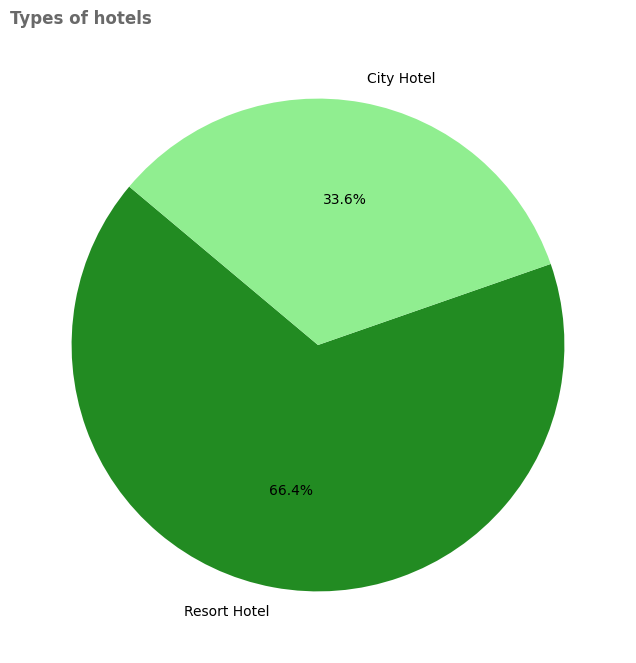

In [92]:
hotel_counts = hotel_df['hotel'].value_counts()
plt.figure(figsize=(8, 8))

colors = ['forestgreen', 'lightgreen']
hotel_counts = hotel_df['hotel'].value_counts()

sorted_labels = hotel_counts.index[::-1]
plt.pie(hotel_counts, labels=sorted_labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'black'})
plt.title('Types of hotels', pad=10, color="dimgray", fontsize=12, loc="left", weight="bold",)
plt.show()


# **Question 2:** What percentage of bookings were cancelled? What type of chart do you suggest to show the results?

In [127]:
total_reservations = len(hotel_df)
cancelled_reservations = len(hotel_df[hotel_df['is_canceled'] == 1])
reservations = len(hotel_df[hotel_df['is_canceled'] == 0])
cancellation_percentage = (cancelled_reservations / total_reservations) * 100
print(f"Reservation cancellation percentage: {cancellation_percentage:.2f}%")


Reservation cancellation percentage: 37.04%


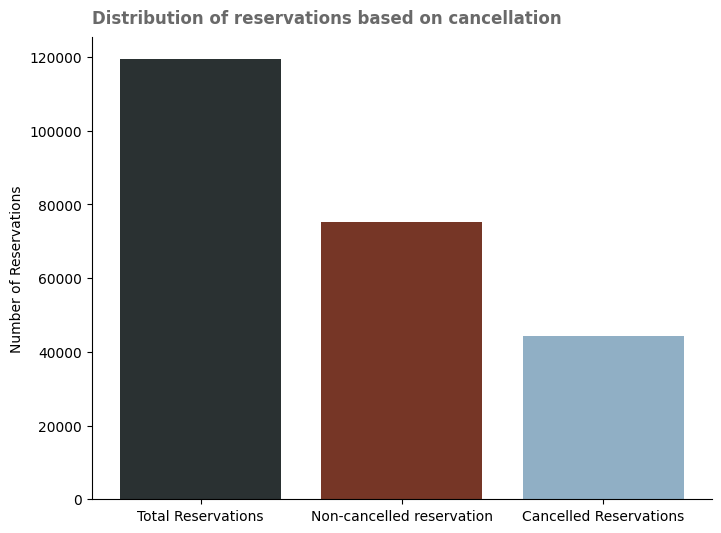

In [128]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Reservations','Non-cancelled reservation', 'Cancelled Reservations'],
        [total_reservations, reservations, cancelled_reservations],
        color=['#2A3132', '#763626', '#90AFC5'])
plt.ylabel('Number of Reservations')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("Distribution of reservations based on cancellation", pad=10, color="dimgray", fontsize=12, loc="left", weight="bold",)

plt.show()

# **Question 3:** Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results?

In [129]:
hotel_cancelled_counts = hotel_df.groupby('hotel')['is_canceled'].agg(['count', 'sum'])
hotel_cancelled_counts['cancellation_percentage'] = (hotel_cancelled_counts['sum'] / hotel_cancelled_counts['count']) * 100
hotel_cancelled_counts

,count,sum,cancellation_percentage
hotel,,,
City Hotel,79330,33102,41.726963
Resort Hotel,40060,11122,27.763355


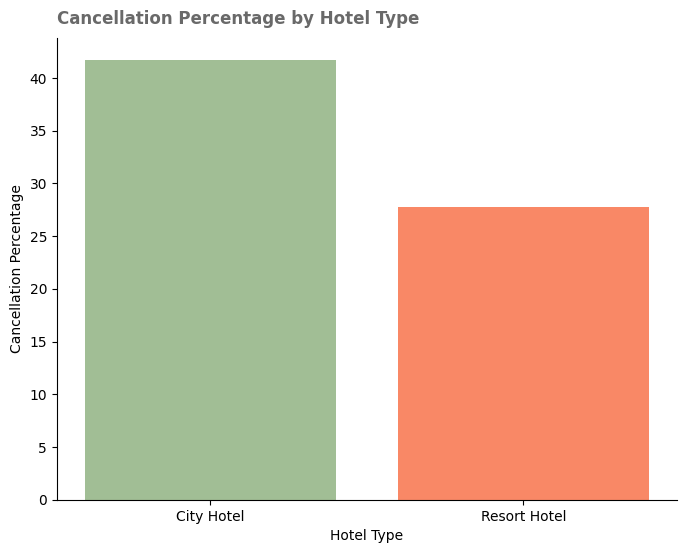

In [130]:
plt.figure(figsize=(8, 6))
plt.bar(hotel_cancelled_counts.index, hotel_cancelled_counts['cancellation_percentage'], color=['#A1BE95', '#F98866'])

plt.title('Cancellation Percentage by Hotel Type', pad=10, color="dimgray", fontsize=12, loc="left", weight="bold")
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Percentage')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


# **Question 4:** In different years, what type of hotels were booked most and booked least? Draw a proper countplot to show the results.

In [141]:
hotel_type_by_year = hotel_df.groupby(['arrival_date_year', 'hotel']).size()

max_reservations_by_year = hotel_type_by_year.groupby('arrival_date_year').idxmax()
min_reservations_by_year = hotel_type_by_year.groupby('arrival_date_year').idxmin()

print("The type of hotel with the most reservations for each year:")
print(max_reservations_by_year)
print("The type of hotel with the least reservations for each year:")
print(min_reservations_by_year)

The type of hotel with the most reservations for each year:
arrival_date_year
2015    (2015, City Hotel)
2016    (2016, City Hotel)
2017    (2017, City Hotel)
dtype: object
The type of hotel with the least reservations for each year:
arrival_date_year
2015    (2015, Resort Hotel)
2016    (2016, Resort Hotel)
2017    (2017, Resort Hotel)
dtype: object


# **Question 5:** According to different hotel types, how ‘adr’ changes in different months?

In [ ]:
adr_monthly_by_hotel = hotel_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack()
adr_monthly_by_hotel

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,117.156250,79.283805
August,124.901601,187.566659
December,92.717339,65.409093
February,88.945304,54.081107
January,85.092612,49.131584
July,120.055385,156.166914
June,123.836342,112.340141
March,94.763375,57.569213
May,127.851240,80.551101


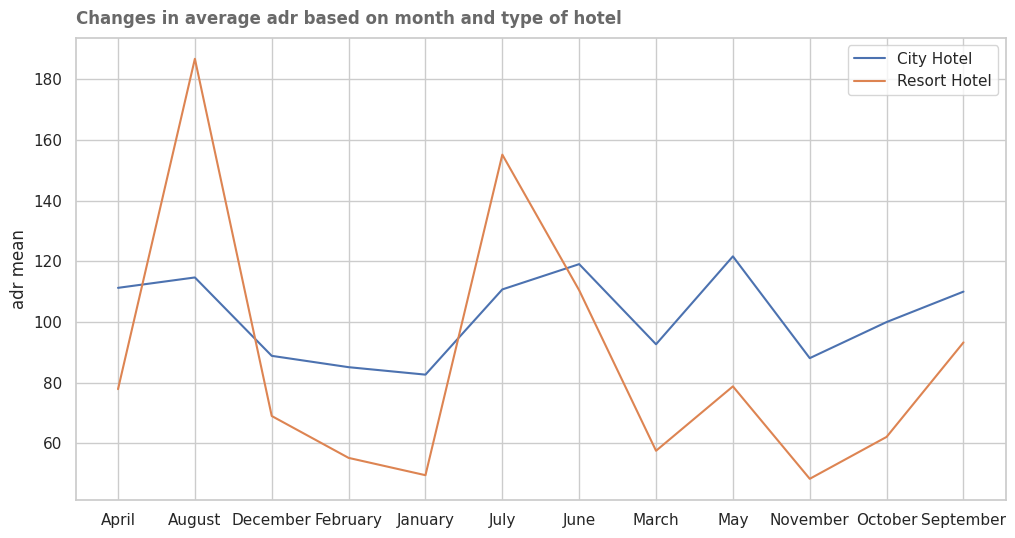

In [162]:
adr_monthly_by_hotel = hotel_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack()

plt.figure(figsize=(12, 6))
for hotel_type in adr_monthly_by_hotel.columns:
    plt.plot(adr_monthly_by_hotel.index, adr_monthly_by_hotel[hotel_type], label=hotel_type)


plt.ylabel('adr mean')
plt.title('Changes in average adr based on month and type of hotel', pad=10, color="dimgray", fontsize=12, loc="left", weight="bold")
plt.legend()
plt.grid(True)
plt.show()

The fluctuation of the average adr of the resort hotel is much higher than that of the city hotel.

# **Question 6:** Check hotel wise daily rates mean, standard deviation, median, min and max.

In [ ]:
average_daily_rate = hotel_df['adr'].describe()
average_daily_rate

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

# **Question 7:** Extract the number of bookings per country and investigate that most of the guests are from which countries?

In [160]:
country_reservations = hotel_df['country'].value_counts()
country_reservations

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [161]:
top_countries = country_reservations.nlargest(5)
top_countries

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

# **Question 8:** According to the ‘market_segment’ most of the guests book their rooms on what channels?

In [ ]:
most_booked_channel_per_market_segment = hotel_df.groupby('market_segment').agg({'distribution_channel' : 'max'})
most_booked_channel_per_market_segment

,distribution_channel
market_segment,
Aviation,TA/TO
Complementary,TA/TO
Corporate,TA/TO
Direct,Undefined
Groups,TA/TO
Offline TA/TO,TA/TO
Online TA,Undefined
Undefined,Undefined


# **Additional question 1:** On average, what kind of room do the people of each country book in a hotel?

In [170]:
avg_room_type_by_country = hotel_df.groupby('country')['reserved_room_type'].apply(lambda x: x.mode().iloc[0])
avg_room_type_df = pd.DataFrame(avg_room_type_by_country)
avg_room_type_df

,reserved_room_type
country,
ABW,A
AGO,A
AIA,G
ALB,A
AND,A
...,...
VGB,A
VNM,A
ZAF,A


#**Additional question 2:** What are the waiting days according to the type of room and type of hotel?

In [172]:
avg_waiting_days_by_hotel_room_type = hotel_df.groupby(['hotel', 'reserved_room_type'])['days_in_waiting_list'].size()
avg_waiting_days_by_hotel_room_type

hotel         reserved_room_type
City Hotel    A                     62595
              B                      1115
              C                        14
              D                     11768
              E                      1553
              F                      1791
              G                       484
              P                        10
Resort Hotel  A                     23399
              B                         3
              C                       918
              D                      7433
              E                      4982
              F                      1106
              G                      1610
              H                       601
              L                         6
              P                         2
Name: days_in_waiting_list, dtype: int64